# EOS 491 // EOS 518: Assignment 1.1. Sedimentary Transport


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

__Question 1 (2)__

Describe (in words) the assumptions made about the flux of sediments on the upstream and
downstream boundaries of this moving system.

__Answer:__

- For the upstream boundary, the authors assume a constant average sediment input, a constant sea level, and constant sediment-dispersal processes. Also, they assume that the sediments are transported by bulk processes like landslides or creeping. Finally, they  assume a constant velocity of progradation $u_0$.

- Downstream, the authors assume a horizontal floor and a uniform distribution of the sediments in the direction perpendicular to the flow. Also, they assume that landslides occur at low angles.

__Question 2 (2)__

The system above describes a delta prograding across a flat surface. If the modeled delta were
to prograde down a ramp with a constant slope, what changes might you expect, if any, in the
shape of the delta front?


__Answer:__

In this case, the following boundary condition would not apply: $h(\infty , t) = 0$. Instead, as $x$ goes to infinity, the height of the delta would depend on the angle of the slope. Specifically, the boundary condition would be $h(\infty, 0) = x \tan (\theta)$. As a result, the solution to the diffusion equation in this case would be: $h(x,t) = h_0 e^{\frac{-u_0}{K} (x - u_0 t)} + x \tan (\theta)$.

When $\theta = 0$, this solution reduces to the one of Kenyon and Turcotte as expected. In addition, h(x,t) is a solution to the diffusion equation because 
$\frac{\partial h}{\partial t} = \frac{h_0 u_0 ^2}{K} e^{\frac{-u_0}{K} (x - u_0 t)}$, and 
$\frac{\partial^2 h}{\partial x^2} = \frac{h_0 {u_0}^2}{K^2} e^{\frac{-u_0}{K} (x - u_0 t)}$. As a result $\frac{\partial h}{\partial t} = K \frac{\partial^2 h}{\partial t^2}$


We can plot this new solution to see how the delta front changes. 

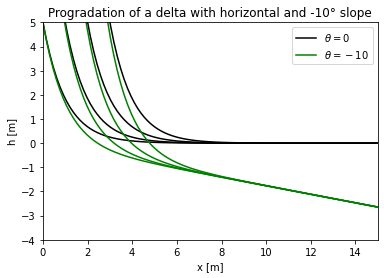

In [2]:
# define constants
u0, K, h0 = 1, 1, 5

#define solution function
x = np.linspace(0, 15, 100)
h = lambda x,t,theta: h0 * np.exp(- (x - u0 * t) * u0 / K) +\
    x * np.tan(math.radians(theta))

#plot for different times
for t in range(0,4):
    plt.plot(x, h(x, t, 0), 'k')
    plt.plot(x, h(x, t, -10), 'g')
plt.axis([0, 15, -4, 5])
plt.xlabel('x [m]')
plt.ylabel('h [m]')
plt.legend([r'$\theta=0$', r'$\theta = -10$'])
plt.title('Progradation of a delta with horizontal and -10° slope');

From the above figure we can see that the front of the delta is different when $\theta=0$ and when $\theta=-10^\circ$. When the delta progrades down a ramp with a constant slope, the delta front tends to follow the slope. As a result, the font of the delta is a little tilted.

__Question 3 (2)__

Showing all your steps, derive the solution to the diffusion equation within a moving
reference frame (a second-order, ordinary differential equation).


__Answer:__

Let's start with the diffusion equation in a moving frame of reference:

\begin{equation}
\frac{\partial^2 h}{\partial \xi^2} + \frac{u_0}{K} \frac{ \partial h}{\partial \xi} =0 \tag{1}
\end{equation} 

Let's assume that the solution  is of the form $h=e ^{\lambda  \xi + a}  + b$. We know that $h' = \lambda e^{\lambda \xi +a}$ and $h'' = \lambda^2 e^{\lambda \xi +a}$.

Substituting into equation 1, we got:

\begin{equation*}
\lambda^2 e^{\lambda \xi +a} + \frac{u_0}{K} \lambda e ^{\lambda \xi +a}=0; \Rightarrow \lambda e ^{\lambda \xi+a} (\lambda + \frac{u_0}{K})=0;  \Rightarrow \lambda = -\frac{u_0}{K}
\end{equation*}

As a result, we obtain that the general solution is:
\begin{equation*}
h=e ^{-\frac{u_0}{K} \xi + a}  + b = e ^{-\frac{u_0}{K} \xi} e^a  + b
\end{equation*} 

Setting $A = e^a$ we get: 
\begin{equation*}
h=A e ^{-\frac{u_0}{K} \xi}  + b
\end{equation*} 

Substituting $\xi = x - u_0 t$ we obtain:
\begin{equation*}
h=A e ^{-\frac{u_0}{K} ( x - u_0t)}  + b
\end{equation*} 

Since we have to meet the boundary conditions $h=0$ when $x \to \infty$ and $h=h_0$ when  $x=0$, we obtain that $A=h_0$ and $b=0$, so the final solution is:

\begin{equation*}
\boxed{h=h_0 e ^{-\frac{u_0}{K} ( x - u_0t)}}
\end{equation*} 

__Question 4 (2)__

What does the following expression from Kenyon and Turcotte (1985) represent:

\begin{align*}
\frac{u_0}{K} (x − u_0 t_0 )
\end{align*}

__Answer:__

Let's start noting that $u_0 t$ is the distance the delta has prograded in a time $t$. Thus $x - u_0 t$ is the distance of progradation of the delta measured from a stand point $x$. $K [m^2/y]$ is the diffusivity of the delta, and is a measure of how much the sediments move in the delta. Thus $\frac{K}{u_0}$ has units of distance and it can be interpreted as a measure of the geometry of the delta. When $\frac{K}{u_0} >> 1$ and ${K}>>{u_0}$, the sediments move a lot in the delta, but the velocity of progradation is slow. This means that the delta is very deep, and it can not be prograded rapidly despite high diffusivity. When $\frac{K}{u_0} << 1$ and ${K}<<{u_0}$, there is little sediment movement in the delta, but it progrades fast. This means that the delta is shallow.  

When we divide $(x - u_0 t)$ by $\frac{K}{u_0}$, we obtain $\frac{u_0}{K}(x-u_0 t)$. This is a dimensionless number that is proportional to the distance the delta has prograded, and inversely proportional to the geometry of the delta. 

__Question 5 (4)__

From equations to code. Using equations from Kenyon and Turcotte (1985) and a programming
language of your choice:

(a) (2 points) Make plots that demonstrate delta progradation into a basin over four timesteps.
   (hint: recreate the cartoon in Figure 2 from the paper with your code). For this question,
    assume some fixed diffusivity, progradation velocity and delta height above the basin floor.

(b) (2 points) Describe in a few short sentences how and why changes the height of the delta
    front changes with distance from the delta top.


__Answer:__
    
a) Let's plot the delta's height with the solution found in question 3 for four different time steps:

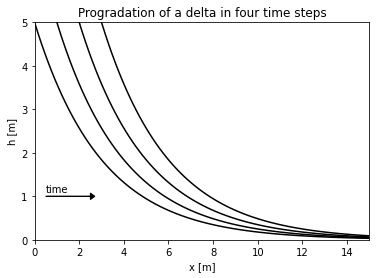

In [3]:
def plot_delta(h0, u0, K, t, xmax=15, xsteps=100, ltype='-',title=''):
    '''makes a plot of the solution of the hillslope application of
    the diffusion equation
    ------
    h0 (int, float) - initial height of the delta
    u0 (int, float) - velociy of progradation of the delta
    K (int, float) - sedimentary diffusivity
    xmax (int, float) - max value of x
    xsteps (int) - number of x steps
    ltype (str) - line type for the plot
    title (str) - title for the plot'''
    #define solution function
    x = np.linspace(0, xmax, xsteps)
    h = lambda x,t: h0 * np.exp(- (x - u0 * t) * (u0 / K)) 

    plt.plot(x, h(x, t), 'k', ls=ltype)
    plt.axis([0, xmax, 0, h0])
    plt.xlabel('x [m]')
    plt.ylabel('h [m]')
    plt.title(title);

for t in range(4):
    plot_delta(5, 1, 3, t, title='Progradation of a delta in four time steps')
plt.arrow(0.5, 1, 2, 0, head_width=0.15, head_length=0.2, fc='k', ec='k')
plt.text(0.5, 1.1, 'time');

b) The height of the delta front decreases exponentially with distance from the delta top. This is because the solution has a negative sign related to x in the exponential: $h=h_0 e ^{-\frac{u_0}{K} ( x - u_0t)}$. As a result, as $x$ increases, $h$ decreases exponentially.

__Question 6 (13)__

Exploring variations in delta shape. Make plots that demonstrate:

(a) (2 points) How the shape of a delta front is a function of sediment diffusivity.

(b) (3 points) Using these plots, describe in a few short sentences how and why changes in
sediment diffusivity influence bulk transport.

(c) (2 points) How the shape of a delta front is a function of progradation velocity.

(d) (3 points) Using these plots, describe in a few short sentences how and why changes in
progradation rate influence bulk transport.

(e) (3 points) Under what conditions might bulk sediment transport (diffusion) lead to the
steep foreset beds of the Gilbert-type delta? Include in your response discussion about how
the sedimentary environment and sediment properties may control the diffusive coefficient
(K).


__Answer:__

a) Let's plot the delta for for different diffusivity values:

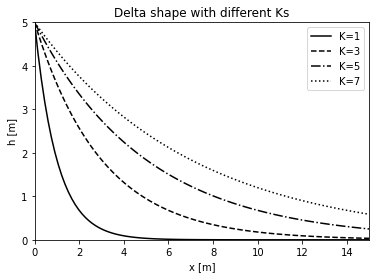

In [4]:
ltypes = ('-', '--', '-.', ':')
Ks = (1,3,5,7)
for K,ltype in zip(Ks,ltypes):
    plot_delta(5, 1, K, 0, ltype=ltype,
        title='Delta shape with different Ks')
plt.legend(['K=' + str(k) for k in Ks]);

b) In the above plot we can see that as $K$ increases, the delta tends to be more filled, less inclined, and height decreases more slowly with distance form the top.This is because a greater sediment diffusivity means that the sediments tend to move more, and there is more bulk transport, casing the delta to be more filled. 

c) Let's plot the delta for for different progradation velolocity values:

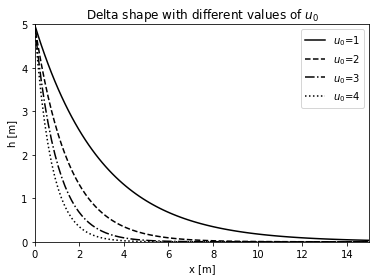

In [5]:
u0s = (1,2,3,4)
for u0,ltype in zip(u0s,ltypes):
    plot_delta(5, u0, 3, 0, ltype=ltype,
        title='Delta shape with different values of $u_0$')
plt.legend(['$u_0$=' + str(u0) for u0 in u0s]);

d) From the above plot we can see that as $u_0$ increases, the shape of the delta is more and more inclined, less filled, and the height tends to decrease more rapidly with distance from the top. This is because an increasing value of $u_0$ means that the delta moves more rapidly, and the sediments do not have enough time to move and fill the delta. In other words, an increase in $u_0$ makes bulk movements less frequent.

e) This means that low values of $K$ and high values of $u_0$ would lead to the formation of steep foreset beds of the Gilbert-type delta. For example, if we plot a delta with $h_0 = 5m, \; K=10m^2/y, \; u_0 = 1m/y$ at $t=0$ we obtain a very steep delta. The diffusivity coefficient is controlled by the sediment type and size. A more dense and bigger sediment would be less prone to crawling because it would be heavier and more difficult to move. However, a bigger and more dense sediment would experiment more pressures, and could be more prone to landslides. Also, some environmental variables could affect the value of $K$. For example, a delta with higher sediment supply would generate more landslides and crawling because there would be more sediment to exert pressure on, so landslides would be more common.

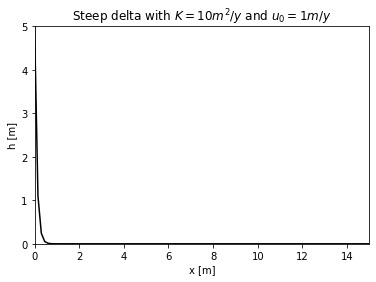

In [6]:
plot_delta(5, 10, 1, 0, title='Steep delta with $K=10m^2/y$ and $u_0 = 1m/y$')

__Question 7 (2)__

Sedimentary Flux: The total volume of sediment added to a delta system during a time interval
$∆t$ is illustrated in Figure 4 of Kenyon and Turcotte (1985); i.e., the integrated area between
the delta front at time = $t_0$ and the delta front at t1. However, equation 25 in the paper gives
a very simple equation for this quantity: volume = $\Delta t · h · u$
where $h$ is the maximum height of the delta front and $u$ is the progradation velocity. Relying
upon your work for question 5a, show numerically that equation 25 (above) from Kenyon and
Turcotte is valid.


__Answer:__

Let's assume that $h_0 = 5m$, $u_0=1m/year$ , $\Delta t=1 year$. This means that the total amount of sediment added to the delta would be $\Delta t · h · u = 5 m^2$. Let's calculate the following integral numerically to see that this is true: 

\begin{equation*}
\int_{0}^{\infty} [h(x, t_0) - h(x,0)]dx - \int_{0}^{u_0 t_0} [h(x,t_0) -h_0]dx 
\end{equation*}

In [7]:
#define constants
h0,u0, K = 5, 1, 1
#define x interval (0, infinity)
x = np.linspace(0, 100, 10000)
#define (0,u0t0) interval
u0t0 = np.linspace(0, 1, 1000)
#define h(x,t)
h = lambda x,t: h0 * np.exp(- (x - u0 * t) * u0 / K) 
#First function to integrate
Dh = h(x,1)-h(x,0)
#second function to integrate
Dh0 = h(u0t0,1) - h0
#perform integrals and substraction
result = np.trapz(Dh, x) - np.trapz(Dh0, u0t0)
print(f'The result of the integral is {result}')

The result of the integral is 5.000070891893174


The result of the integral is approximately $5m^2$ as expected.